**Team Collaboration**

We're a team of 5 members passionate and excited to tacktle in the prediction of Liver cirrhosis outcome.Here is an introduction to our team.

**Team Name: Group 1**

 Team Head : Maliha Muradi
 Maliha Muradi as a team lead playing a critical role in guiding the team and ensured that the team remained focused,organized and productive.

**Team Members and Rolls:**
 
**Maliha Muradi :Data Perp**

 She is playing a roll in Data preparation ,cleaning ,scaling and encoding for analsis.

 **Ali Yaweer Serat: EDA**

 He is playing roll  for EDA a critical step in understanding the dataset and identify the patterns ,trends and relashionship.
 
**Nasratullah Shafiq: Model Building**

  He is responsible  for predictive model building,Algorithms Selection, model development and Heperparameters Tuning tofind outcome.

**Abdul Hadi Hamidi: Model Evaluation**

  He is responsible for model evaluation ,performaning metrics, validation strategies, Error analysing and model comparing.abs

**Aimal Amiri: Submission and generate the prediction**

  He is responsible for generating prediction and preparing the final submission for competition.
  
  
  
 


## **A. Importing Important Libraries**

In [1366]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score

## **1. Preparing The dataset**

### **1.1. Importing the Train Dataset**

In [1367]:
train=pd.read_csv('/kaggle/input/predicting-cirrhosis-outcomes/train.csv')

### **1.2. Familiarization with the features and target variable**

In [1368]:
import warnings
warnings.filterwarnings("ignore")
train

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1690.0,Placebo,16714.0,F,N,Y,Y,N,14.4,514.0,3.16,42.0,2184.0,185.00,126.0,319.0,13.2,4.0,D
1,1,2216.0,D-penicillamine,19327.0,F,Y,Y,N,N,1.3,NaN,3.03,234.0,601.0,135.00,NaN,559.0,11.5,4.0,D
2,2,1725.0,Placebo,12897.0,F,N,N,N,N,0.8,232.0,3.85,9.0,1074.0,128.65,99.0,295.0,9.5,3.0,C
3,3,2468.0,D-penicillamine,20555.0,F,N,N,Y,N,0.5,176.0,3.61,121.0,558.0,96.10,55.0,151.0,11.0,3.0,C
4,4,999.0,D-penicillamine,26580.0,M,N,N,N,N,1.8,318.0,3.52,73.0,721.0,85.25,260.0,NaN,9.6,2.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,837.0,Placebo,13178.0,F,N,N,N,N,2.1,342.0,3.61,52.0,1268.0,60.45,213.0,268.0,10.2,3.0,D
14996,14996,2563.0,NaN,23741.0,F,NaN,NaN,NaN,N,2.7,NaN,3.23,NaN,NaN,NaN,NaN,277.0,10.4,2.0,C
14997,14997,1223.0,D-penicillamine,16071.0,F,N,N,N,N,0.6,NaN,3.34,31.0,663.0,74.40,NaN,311.0,10.6,4.0,C
14998,14998,797.0,D-penicillamine,22388.0,M,N,N,N,N,5.9,364.0,3.38,161.0,1440.0,134.85,164.0,156.0,10.9,2.0,D


In [1369]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1690.0,Placebo,16714.0,F,N,Y,Y,N,14.4,514.0,3.16,42.0,2184.0,185.00,126.0,319.0,13.2,4.0,D
1,1,2216.0,D-penicillamine,19327.0,F,Y,Y,N,N,1.3,NaN,3.03,234.0,601.0,135.00,NaN,559.0,11.5,4.0,D
2,2,1725.0,Placebo,12897.0,F,N,N,N,N,0.8,232.0,3.85,9.0,1074.0,128.65,99.0,295.0,9.5,3.0,C
3,3,2468.0,D-penicillamine,20555.0,F,N,N,Y,N,0.5,176.0,3.61,121.0,558.0,96.10,55.0,151.0,11.0,3.0,C
4,4,999.0,D-penicillamine,26580.0,M,N,N,N,N,1.8,318.0,3.52,73.0,721.0,85.25,260.0,NaN,9.6,2.0,C


In [1370]:
train.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,15000.000000,6612.000000,15000.000000,8364.000000,8485.000000,8480.000000,6560.000000,14429.000000,14979.000000,15000.000000
mean,7499.500000,1970.903067,19271.966733,1.881873,324.806745,3.517281,75.857006,1629.738417,106.603055,111.827439,253.632261,10.636691,3.029000
std,4330.271354,1272.532950,3732.634877,2.790137,172.087714,0.372396,74.839986,1836.475288,51.787553,50.801406,93.050690,0.745795,0.883597
min,0.000000,10.000000,244.000000,0.300000,17.200000,1.860000,2.000000,2.770000,0.900000,33.000000,0.900000,9.000000,1.000000
25%,3749.750000,1092.000000,16467.000000,0.600000,239.000000,3.290000,31.000000,721.000000,71.000000,80.000000,182.000000,10.100000,2.000000
50%,7499.500000,1790.000000,19544.000000,0.900000,280.000000,3.570000,52.000000,1072.000000,97.650000,100.000000,249.000000,10.600000,3.000000
75%,11249.250000,2644.000000,22336.000000,1.800000,358.000000,3.770000,89.000000,1653.000000,133.300000,135.000000,312.000000,11.000000,4.000000
max,14999.000000,25569.000000,94306.000000,28.000000,2880.000000,4.640000,588.000000,18733.000000,601.350000,598.000000,721.000000,20.000000,4.000000


In [1371]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8492 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8494 non-null   object 
 6   Hepatomegaly   8487 non-null   object 
 7   Spiders        8485 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6612 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8364 non-null   float64
 13  Alk_Phos       8485 non-null   float64
 14  SGOT           8480 non-null   float64
 15  Tryglicerides  6560 non-null   float64
 16  Platelets      14429 non-null  float64
 17  Prothrombin    14979 non-null  float64
 18  Stage 

In [1372]:
print('Train Shape:',train.shape)

Train Shape: (15000, 20)


## **2. Exploratory Data Analysis (EDA)**

### ****2.1. Distribution of target variable****

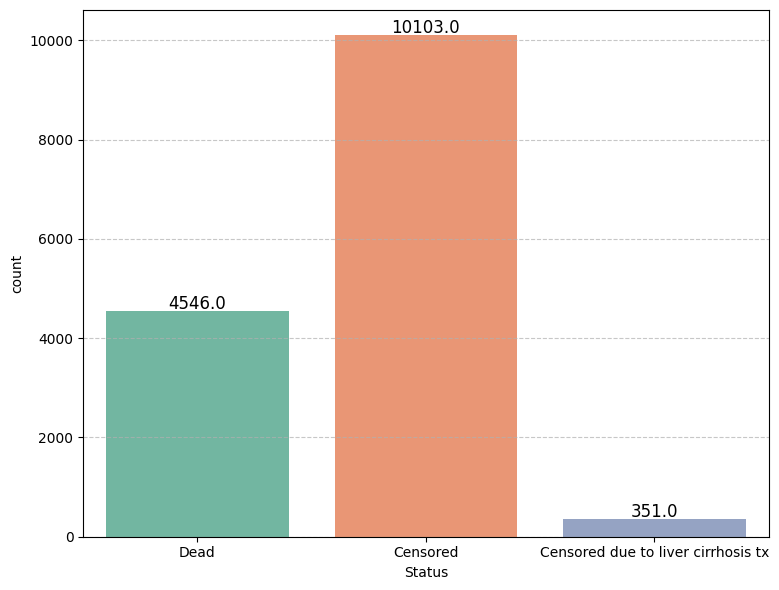

In [1373]:
status_map = {'D': 'Dead', 'C': 'Censored', 'CL': 'Censored due to liver cirrhosis tx'}
train['Status'] = train['Status'].map(status_map)

plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=train, palette='Set2')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### **2.2. Univariate Analysis (Distribution of Features)**

To chose a best strategy for imputing missing values, we need to undrestand the data distribution or distribution of missing values. 

#### **2.2.1. Numerical Features**

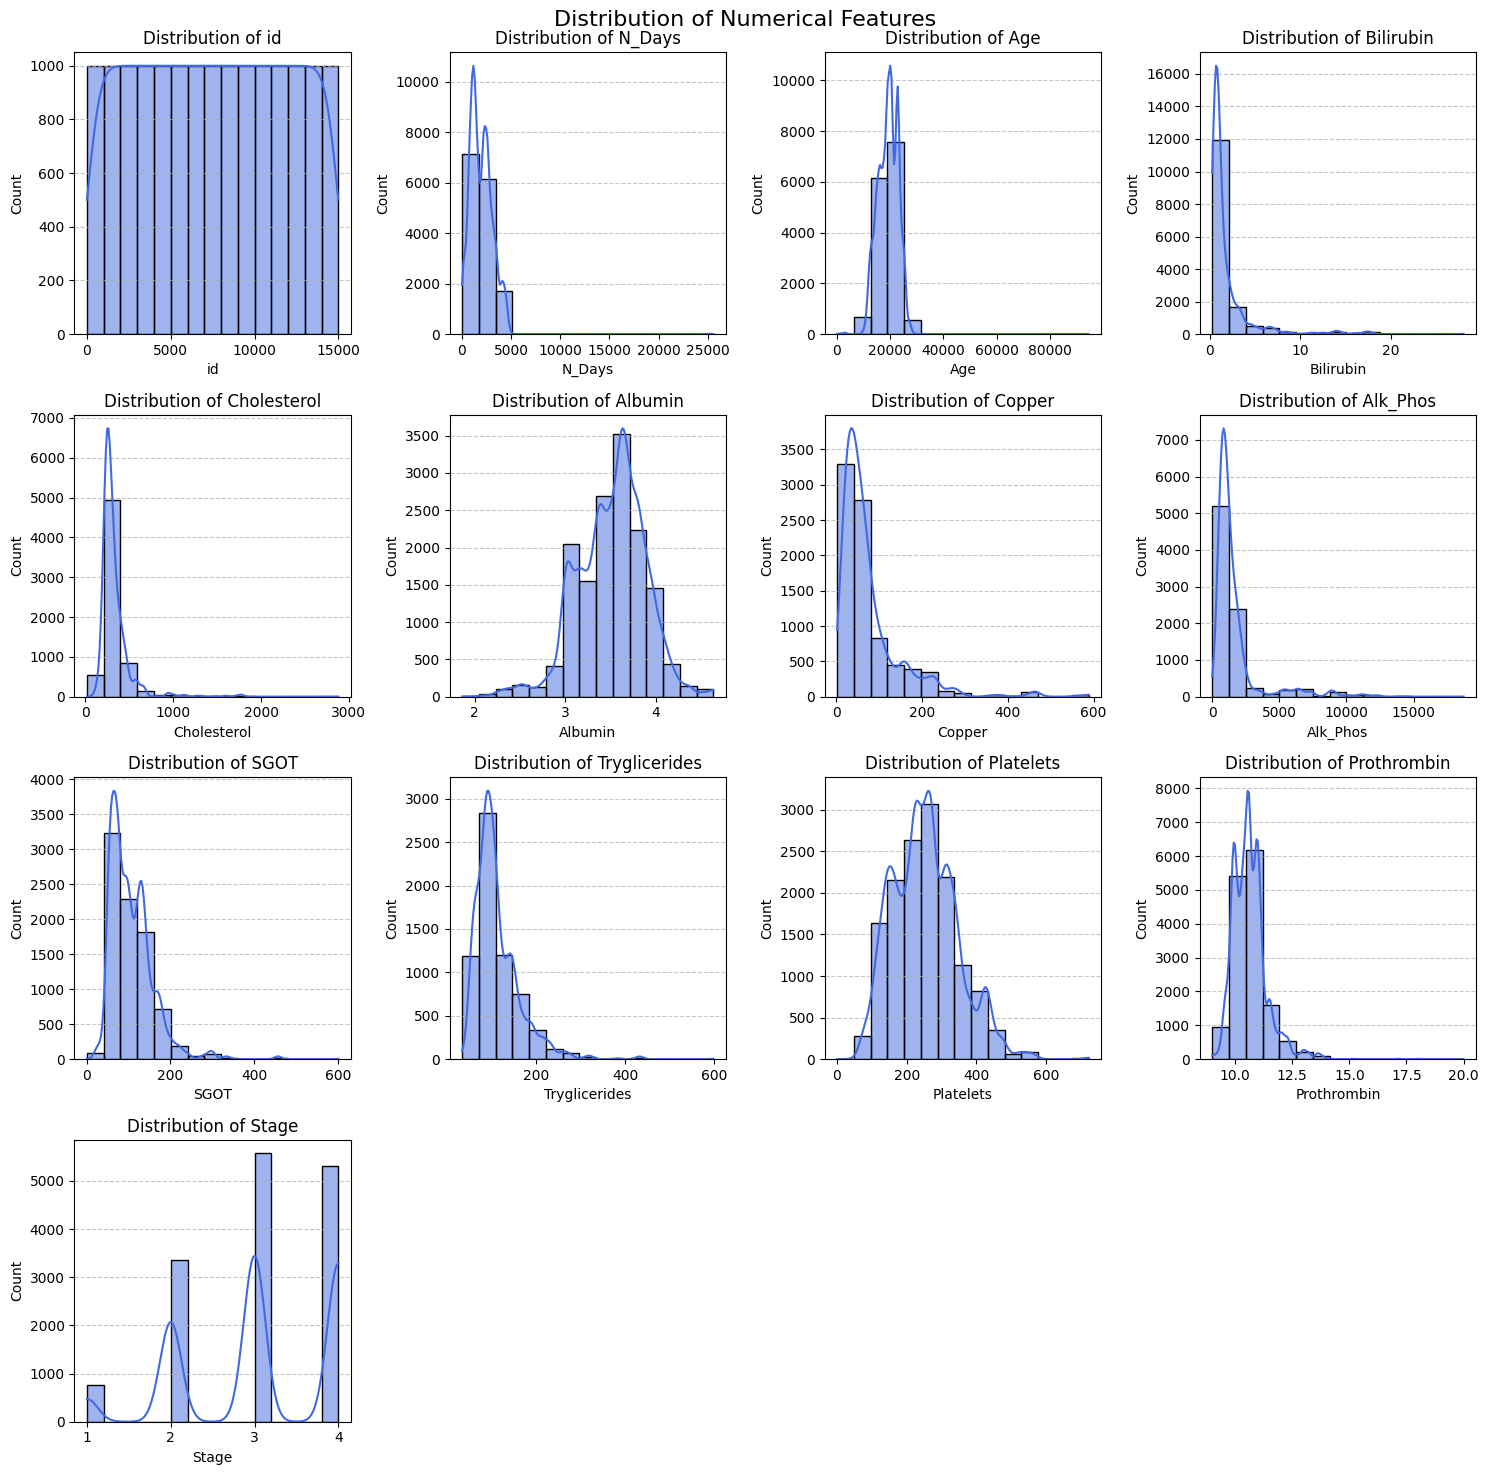

In [1374]:
# Numerical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set up subplots
num_cols = 4
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

# Plot distributions
for i, col in enumerate(numerical_cols):
    sns.histplot(train[col], bins=15, kde=True, ax=axes[i], color="royalblue", edgecolor="black")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

# Add title and show plot
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

#### **2.2.2. Categorical Features**

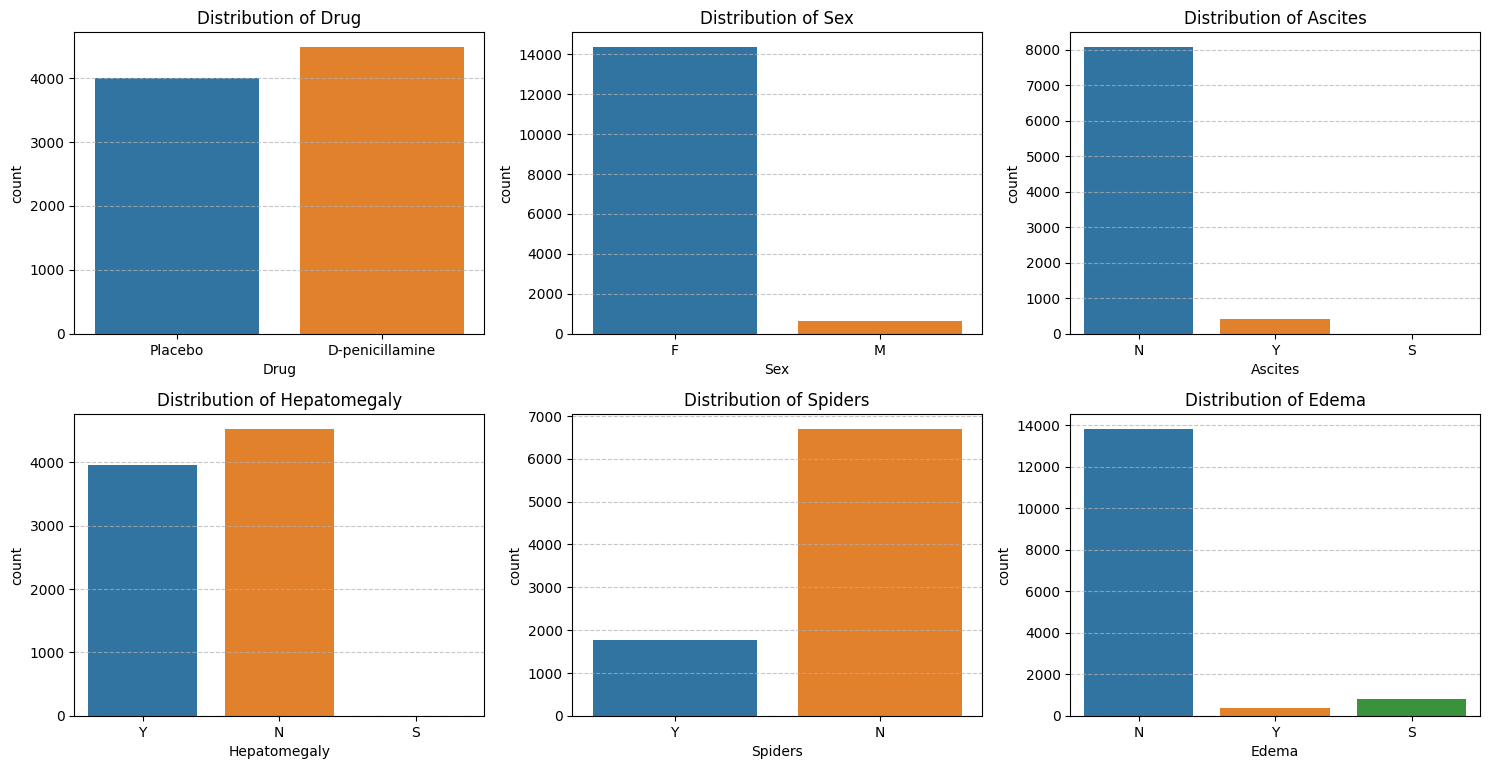

In [1375]:
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
num_cols = 3  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_cols):
    sns.countplot(x=feature, data=train, ax=axes[i]) 
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

### **2.3. Bivariate Analysis (Relationships Between Features)**

#### **2.3.1. Correlation Heatmap (Numerical Features)**

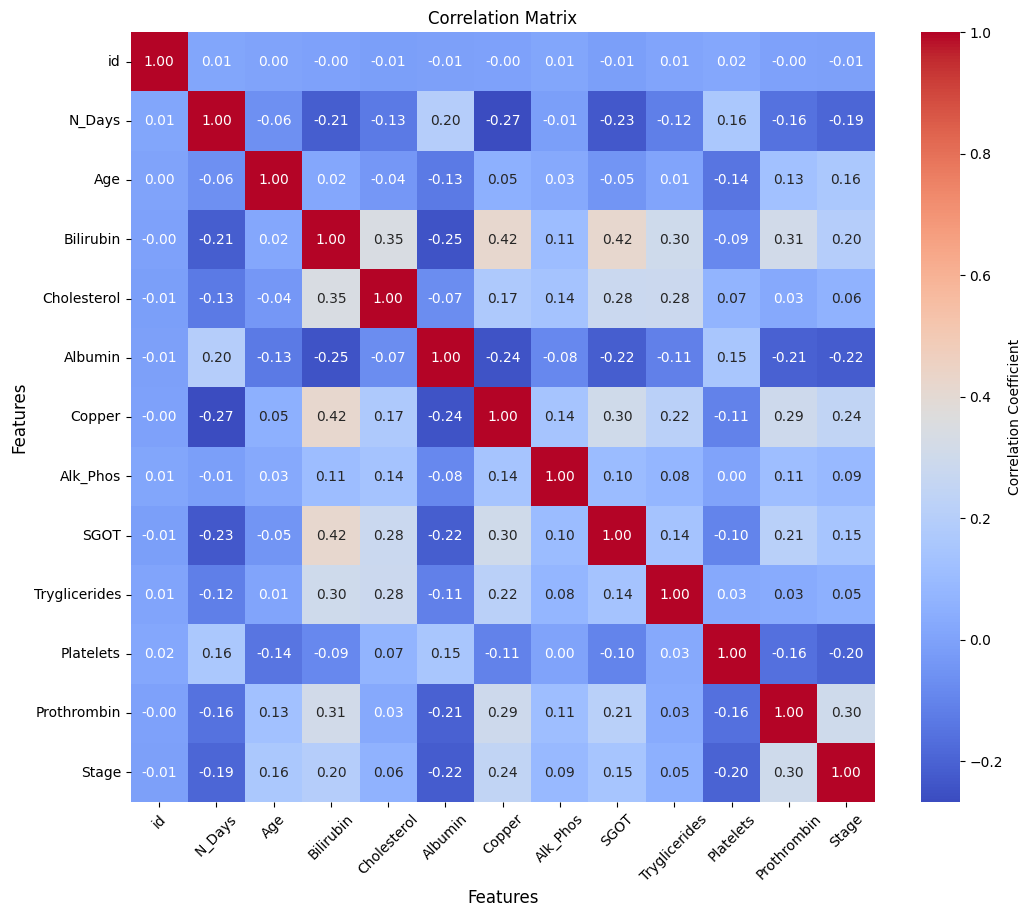

In [1376]:
numeric_data = train.select_dtypes(include=[float, int])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.show()

#### **2.3.2. Boxplot for Numerical Features vs. Status**

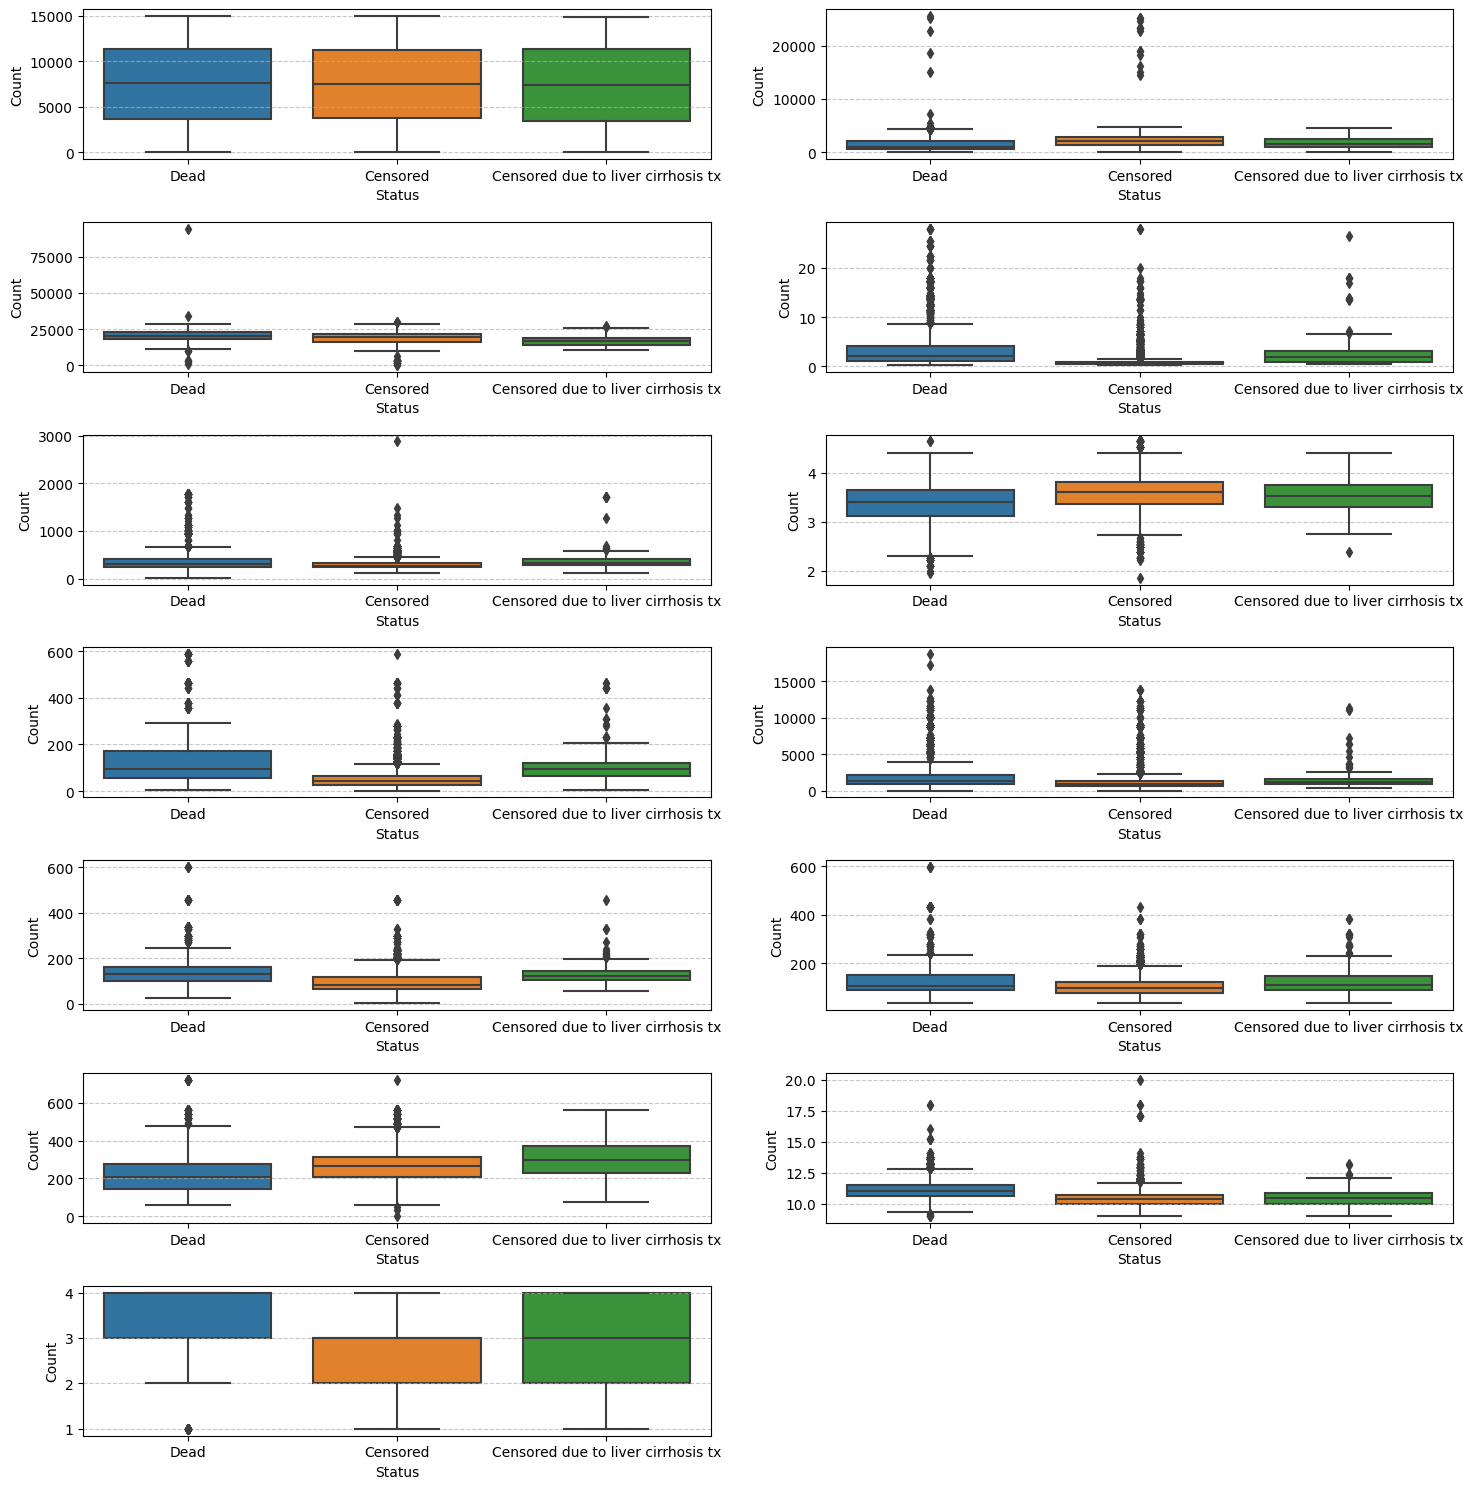

In [1377]:
num_cols = 2
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

# Plot boxplots for numerical features
for i, feature in enumerate(numerical_cols):
    if i < len(axes):
        sns.boxplot(x='Status', y=feature, data=train, ax=axes[i])
        axes[i].set_ylabel('Count')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### **2.3.3. Categorical Features vs. Status**

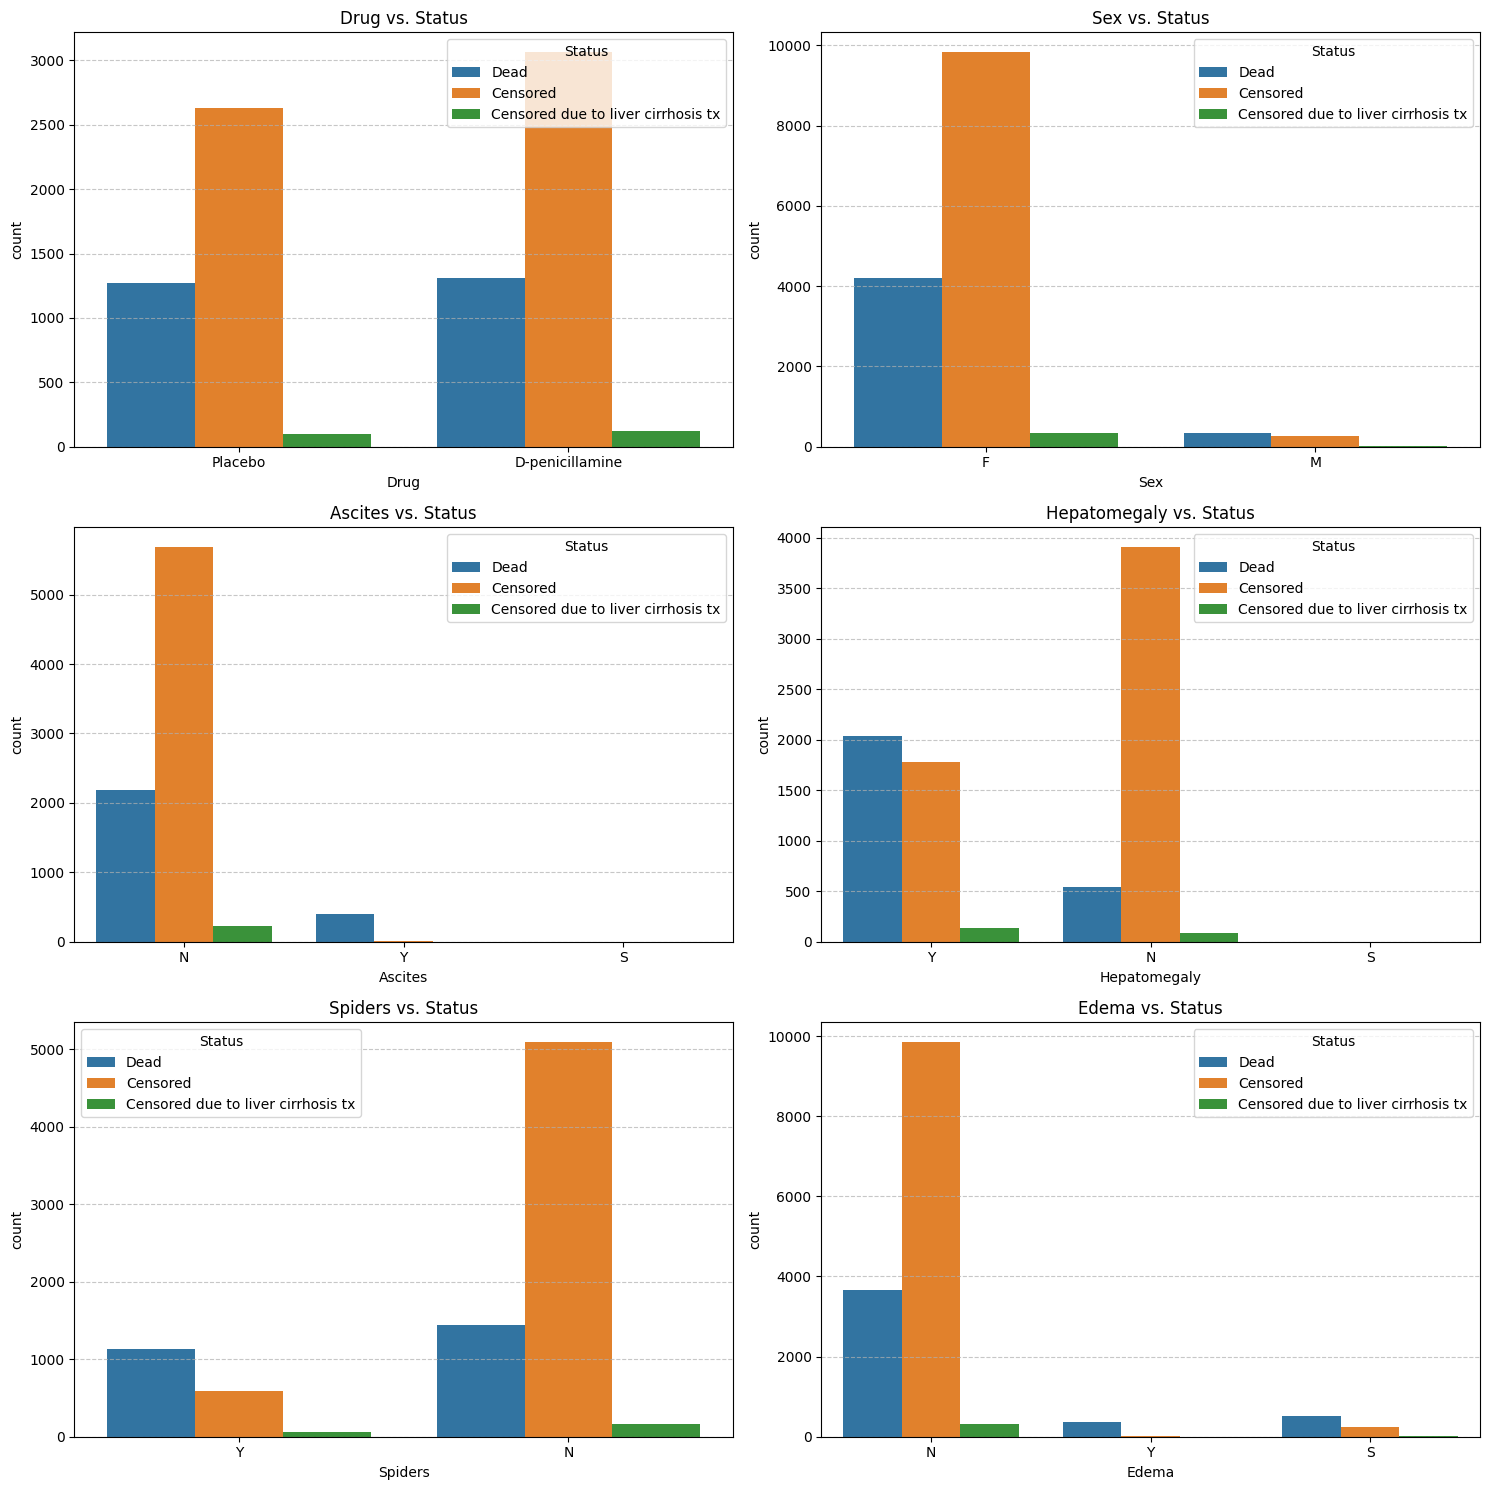

In [1378]:
categorical_features = categorical_cols
num_cols = 2  
num_rows = (len(categorical_features) + num_cols - 1) // num_cols  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    if i < len(axes):
        sns.countplot(x=feature, hue='Status', data=train, ax=axes[i])
        axes[i].set_title(f'{feature} vs. Status')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### **2.4. Outlier Detection**

#### **2.4.1. Outlier for Numerical Features**

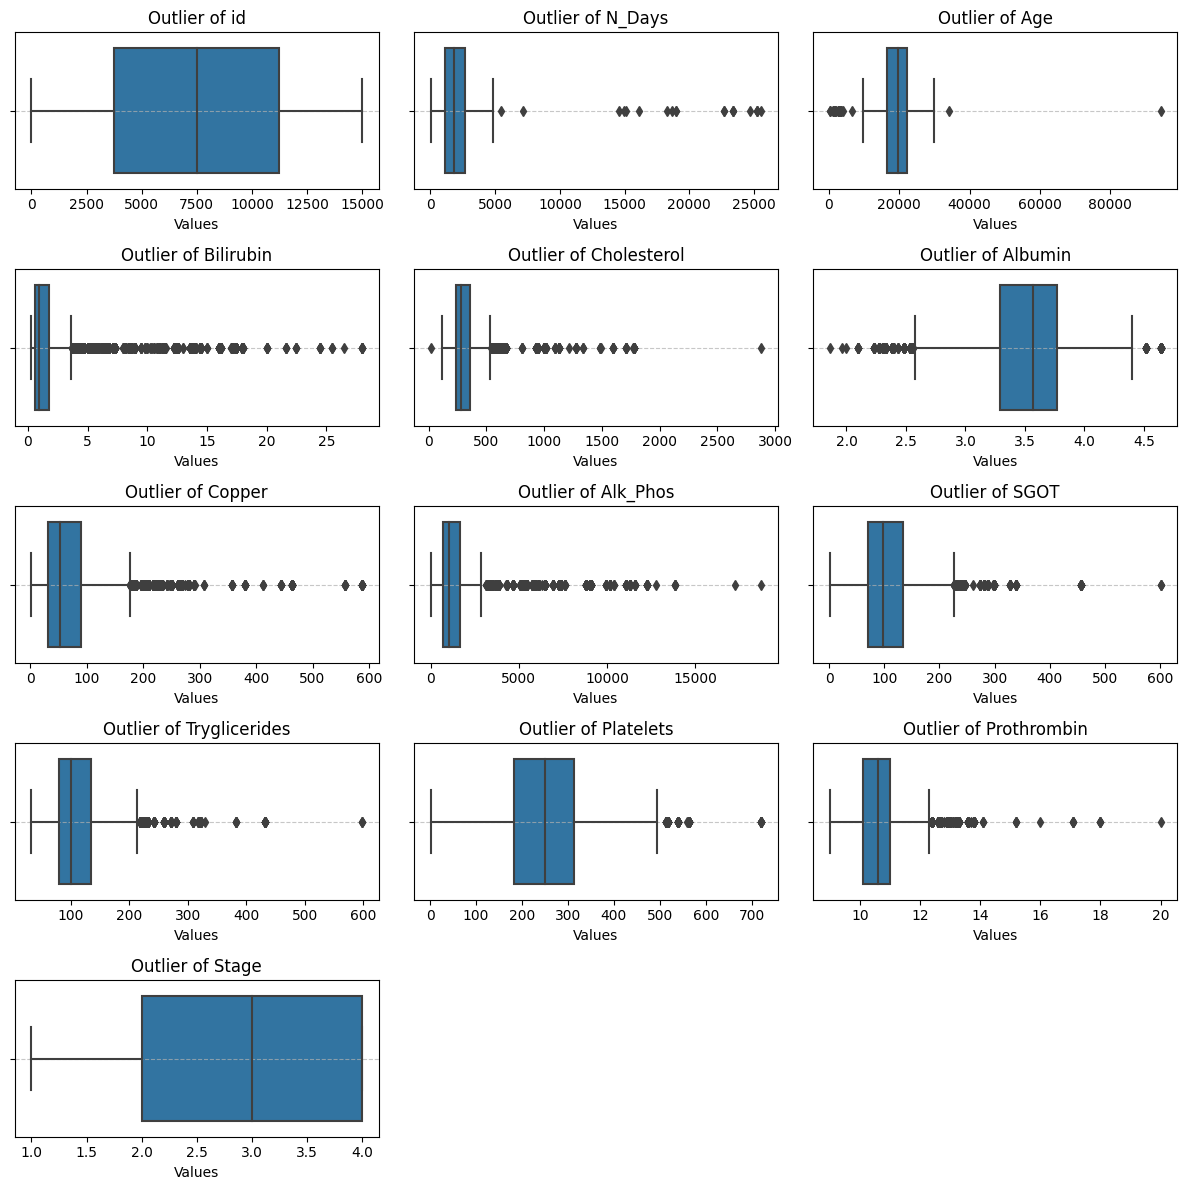

In [1379]:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Set up subplots
num_cols = 3
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
axes = axes.flatten()

# Plot boxplots for numerical features
for i, feature in enumerate(numerical_cols):
    sns.boxplot(x=train[feature], ax=axes[i])
    axes[i].set_title(f'Outlier of {feature}')
    axes[i].set_xlabel('Values')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#### **2.4.2. Oultlier Accross the Numerical Features**

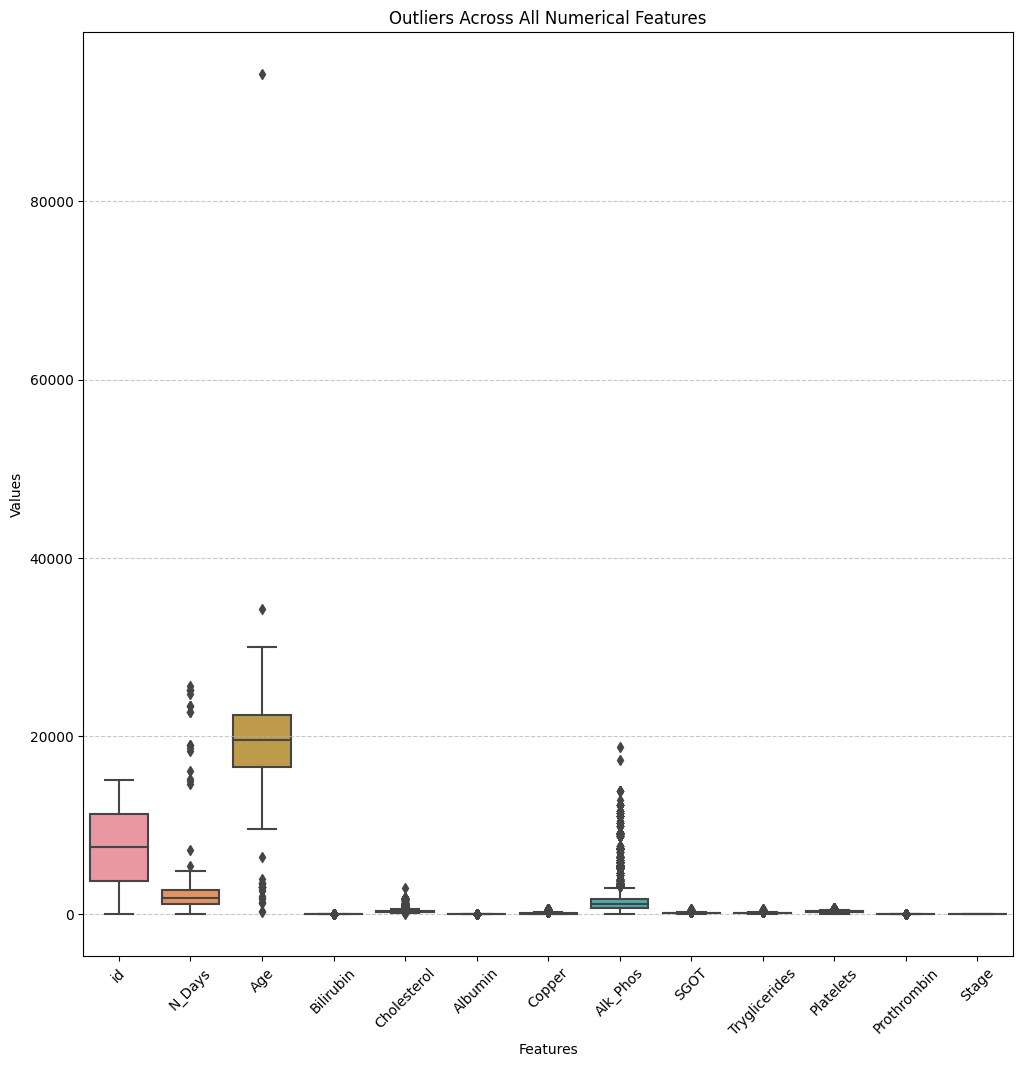

In [1380]:
numerical_cols = train.select_dtypes(include=['float', 'int']).columns
melted_train = train.melt(value_vars=numerical_cols, var_name='Feature', value_name='Value')
plt.figure(figsize=(12, 12))
sns.boxplot(x='Feature', y='Value', data=melted_train)
plt.title("Outliers Across All Numerical Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### **2.4.3.Outlier for combined Box Plot of Numerical Features by Status**

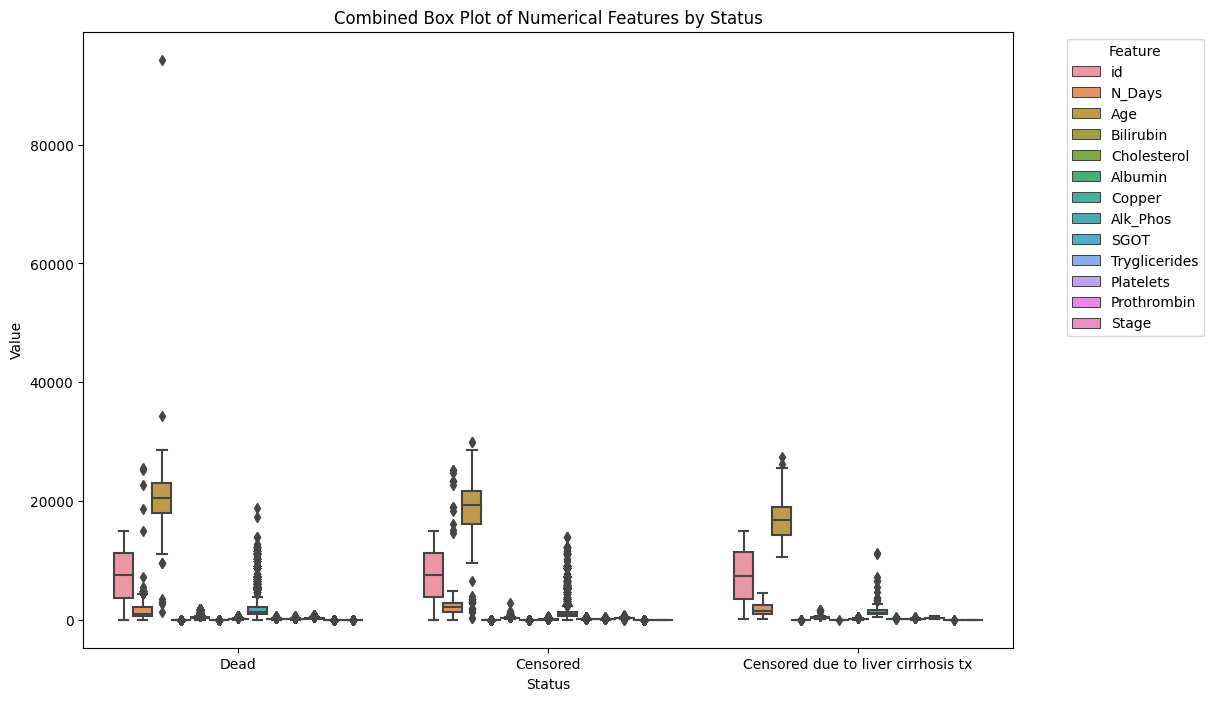

In [1381]:
numerical_cols = train.select_dtypes(include=['float', 'int']).columns
if 'Status' not in train.columns:
    raise ValueError("The 'Status' column is missing from the DataFrame.")
melted_train = train.melt(id_vars='Status', value_vars=numerical_cols, var_name='Feature', value_name='Value')
plt.figure(figsize=(12, 8))
sns.boxplot(x='Status', y='Value', hue='Feature', data=melted_train)
plt.title("Combined Box Plot of Numerical Features by Status")
plt.xlabel("Status")
plt.ylabel("Value")
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **3. Data Preprocessing**

### **3.1. Identifying Missing Values**

In [1382]:
train.isnull().sum()

id                  0
N_Days              0
Drug             6508
Age                 0
Sex                 0
Ascites          6506
Hepatomegaly     6513
Spiders          6515
Edema               0
Bilirubin           0
Cholesterol      8388
Albumin             0
Copper           6636
Alk_Phos         6515
SGOT             6520
Tryglicerides    8440
Platelets         571
Prothrombin        21
Stage               0
Status              0
dtype: int64

In [1383]:
missing_percentage = train.isnull().sum()/len(train)*100
print(missing_percentage)

id                0.000000
N_Days            0.000000
Drug             43.386667
Age               0.000000
Sex               0.000000
Ascites          43.373333
Hepatomegaly     43.420000
Spiders          43.433333
Edema             0.000000
Bilirubin         0.000000
Cholesterol      55.920000
Albumin           0.000000
Copper           44.240000
Alk_Phos         43.433333
SGOT             43.466667
Tryglicerides    56.266667
Platelets         3.806667
Prothrombin       0.140000
Stage             0.000000
Status            0.000000
dtype: float64


### **3.2. Handling missing values**

#### **3.2.1. Imputing Missing Values**

##### **Imputing Strategy**
**Numerical features:** AS the data is skewed or contains extreme values and outlier is a concern, we impute missing value with "**median**".

**Categorical features:** Since the distributions of these categorical variables are highly imbalanced, the best imputation strategy is **Most Frequent (Mode)**.

In [1384]:
# Select numerical and categorical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist() 
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

# Imputation for Numerical Features 
num_imputer = SimpleImputer(strategy='median')
train[numerical_cols] = num_imputer.fit_transform(train[numerical_cols]) 

# Imputation for Categorical Features 
cat_imputer = SimpleImputer(strategy='most_frequent')
train[categorical_cols] = cat_imputer.fit_transform(train[categorical_cols])  

#### **3.2.2. Check for Missing Values After Imputation**¶

In [1385]:
train.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

## **4. Splitting Data**

### **4.1. splits the dataset into features (X) and the target variable (y).**

In [1386]:
print(train['Status'].value_counts())

Status
Censored                              10103
Dead                                   4546
Censored due to liver cirrhosis tx      351
Name: count, dtype: int64


In [1387]:
X = train.drop(columns=['Status']) 
y = train['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 ### **4.2. Separate numerical and categorical columns**

In [1388]:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist() 
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

print("Train - Categorical columns:", categorical_cols)
print("Train - Numerical columns:", numerical_cols)

Train - Categorical columns: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']
Train - Numerical columns: ['id', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


## **5. Feature Normalization and Lable Encoding**

In [1389]:
# Encoding target 'Status' as categorical 
encoder = LabelEncoder()
X = train.drop(columns=['Status']) 
y = encoder.fit_transform(train['Status'])

# Standardize numerical features
scaler = StandardScaler()
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()  
    train[col] = label_encoders[col].fit_transform(train[col])  

## **6. Model Building**

In [1390]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### **6.1. Feature Encoding and Imputing**

In [1391]:
# Encoding target 'Status' as categorical 
encoder = LabelEncoder()
X = train.drop(columns=['Status']) 
y = encoder.fit_transform(train['Status'])

In [1392]:
# Training-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-Hot Encoding categorical columns
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure that X_train and X_test have the same columns after encoding
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)


# Aligning train and test sets to ensure both have the same columns
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

# Imputing missing values in X_train and X_test
imputer = SimpleImputer(strategy='most_frequent') 
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns) 
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)  

In [1393]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (12000, 19)
y_train shape: (12000,)


In [1394]:
print(X_train.dtypes)

id               float64
N_Days           float64
Drug             float64
Age              float64
Sex              float64
Ascites          float64
Hepatomegaly     float64
Spiders          float64
Edema            float64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [1395]:
print(X_train.head())

         id    N_Days  Drug       Age  Sex  Ascites  Hepatomegaly  Spiders  \
0  0.540284 -1.109559   0.0  0.316686  0.0      0.0           0.0      0.0   
1  0.503565 -0.161811   0.0  2.512527  0.0      0.0           0.0      1.0   
2 -0.093877  0.110097   0.0  0.121107  0.0      0.0           0.0      0.0   
3  0.876071 -0.710342   0.0  1.001748  0.0      0.0           0.0      0.0   
4 -1.542564  0.832302   0.0  0.903958  0.0      0.0           0.0      0.0   

   Edema  Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0    0.0  -0.387762    -0.169694  0.786070 -0.232873 -0.223986 -0.129158   
1    0.0  -0.101028     1.273718  0.651800  0.169759  0.171458  0.108159   
2    0.0  -0.029345    -0.169694 -0.476071 -0.232873 -0.223986 -0.129158   
3    0.0  -0.459446    -0.169694  0.786070 -0.232873 -0.223986 -0.129158   
4    0.0  -0.459446    -0.169694  1.108319 -0.232873 -0.223986 -0.129158   

   Tryglicerides  Platelets  Prothrombin     Stage  
0      -0.151680  -0.

### **6.2. Random Forest Model**

In [1396]:
model = RandomForestClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

## **7. Preparing Test Dataset**

In [1397]:
test=pd.read_csv('/kaggle/input/predicting-cirrhosis-outcomes/test.csv')

In [1398]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,708.0,NaN,18628.0,F,NaN,NaN,NaN,N,3.2,NaN,3.15,NaN,NaN,NaN,NaN,388.0,9.9,3.0
1,15001,971.0,Placebo,19470.0,F,N,N,Y,N,20.0,1276.0,3.04,141.0,2496.0,203.05,157.0,319.0,12.9,4.0
2,15002,1427.0,D-penicillamine,11872.0,F,N,N,N,N,0.5,257.0,3.74,37.0,9009.8,127.00,73.0,283.0,10.4,2.0
3,15003,1097.0,NaN,18993.0,F,NaN,NaN,NaN,N,1.8,NaN,3.20,NaN,NaN,NaN,NaN,117.0,10.7,2.0
4,15004,2103.0,NaN,22797.0,F,NaN,NaN,NaN,S,0.9,NaN,3.75,NaN,NaN,NaN,NaN,226.0,9.9,2.0


### **7.1. Identify Missing Values**¶

In [1399]:
test.isnull().sum()

id                  0
N_Days              0
Drug             4369
Age                 0
Sex                 0
Ascites          4363
Hepatomegaly     4374
Spiders          4375
Edema               0
Bilirubin           0
Cholesterol      5605
Albumin             0
Copper           4446
Alk_Phos         4372
SGOT             4374
Tryglicerides    5640
Platelets         362
Prothrombin        15
Stage               0
dtype: int64

In [1400]:
test.isnull().sum()/len(train)*100

id                0.000000
N_Days            0.000000
Drug             29.126667
Age               0.000000
Sex               0.000000
Ascites          29.086667
Hepatomegaly     29.160000
Spiders          29.166667
Edema             0.000000
Bilirubin         0.000000
Cholesterol      37.366667
Albumin           0.000000
Copper           29.640000
Alk_Phos         29.146667
SGOT             29.160000
Tryglicerides    37.600000
Platelets         2.413333
Prothrombin       0.100000
Stage             0.000000
dtype: float64

### **7.2. Handling missing values**

#### **7.2.1. Imputing Missing Values**¶

In [1401]:
numerical_cols = test.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = test.select_dtypes(include=['object']).columns.tolist()

# Fit the imputers on the training data
num_imputer.fit(train[numerical_cols])
cat_imputer.fit(train[categorical_cols])

# Impute missing values in numerical columns (using the fitted imputer)
num_imputer = SimpleImputer(strategy="median")
test[numerical_cols] = num_imputer.fit_transform(test[numerical_cols])
test[numerical_cols] = num_imputer.transform(test[numerical_cols])

# Impute missing values in categorical columns (using the fitted imputer)
cat_imputer = SimpleImputer(strategy="most_frequent")  
test[categorical_cols] = cat_imputer.fit_transform(test[categorical_cols])
test[categorical_cols] = cat_imputer.transform(test[categorical_cols])

#### **7.2.2. Check for Missing Values After Imputation**¶

In [1402]:
test.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

### **7.3. Feature Normalization and Lable Encoding**

In [1403]:
test[numerical_cols] = scaler.transform(test[numerical_cols])

# Encode categorical features
for col in categorical_cols:
    test[col] = label_encoders[col].transform(test[col])

In [1404]:
# Reset index for both X_train and y_train
X_train = X_train.reset_index(drop=True)
y_train = pd.Series(y_train).reset_index(drop=True)

# Alighn X_train and y_train
y_train = y_train.loc[X_train.index]

## **8. Model Evaluation**

In [1405]:
print("X_train shape:", X_train.shape)  
print("y_train shape:", y_train.shape)  

X_train shape: (12000, 19)
y_train shape: (12000,)


### **8.1. Predict the Model**

In [1406]:
# Predictions on test data
y_pred = model.predict(X_test)

### **8.2. Evaluate Model Performance**

### **8.2.1. Accuracy Score**

In [1407]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.851


#### **8.2.2. Classification Report**

In [1408]:
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      2021
           1       0.00      0.00      0.00        79
           2       0.83      0.71      0.77       900

    accuracy                           0.85      3000
   macro avg       0.56      0.55      0.56      3000
weighted avg       0.83      0.85      0.84      3000



#### **8.2.3. Confusion Matrix**

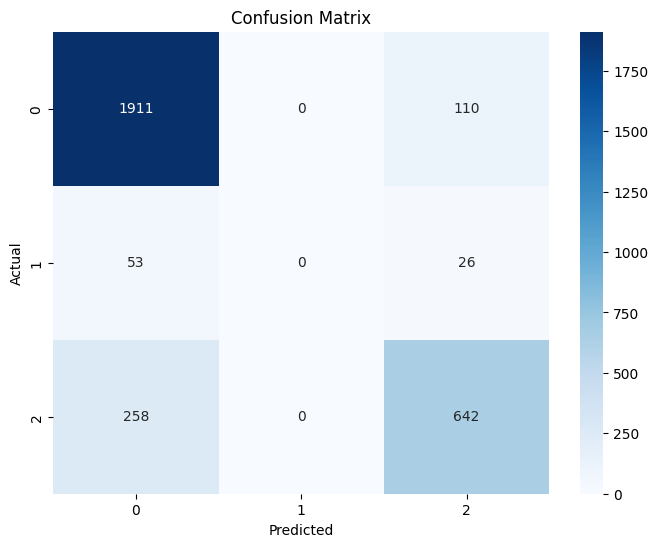

Confusion Matrix:
[[1911    0  110]
 [  53    0   26]
 [ 258    0  642]]


In [1409]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#### **8.2.4. Cross-Validation**

In [1410]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring = 'accuracy')

# Print the results
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 0.85 ± 0.01
Mean CV Accuracy: 0.8477500000000001


 ### **8.3. Advanced Evaluation Metrics**

#### **8.3.1. ROC-AUC and ROC Curve (multi-class classification)**

ROC-AUC Score: 0.8943335369294303


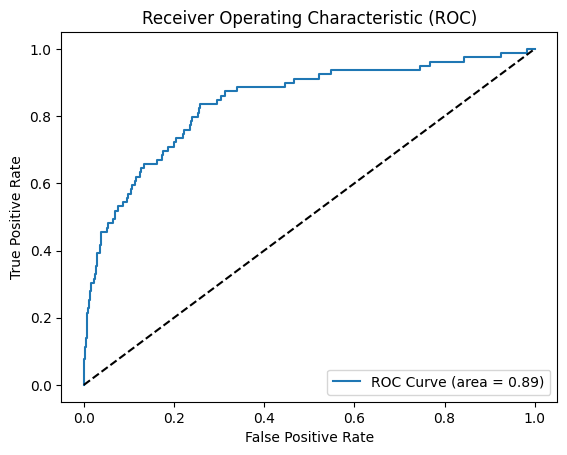

In [1411]:
# Predicted probabilities for ROC-AUC
y_pred_proba = model.predict_proba(x_test)

# Calculate ROC-AUC Score (for multi-class classification)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.show()

#### **8.3.2. Precision-Recall Curve (for each class)**

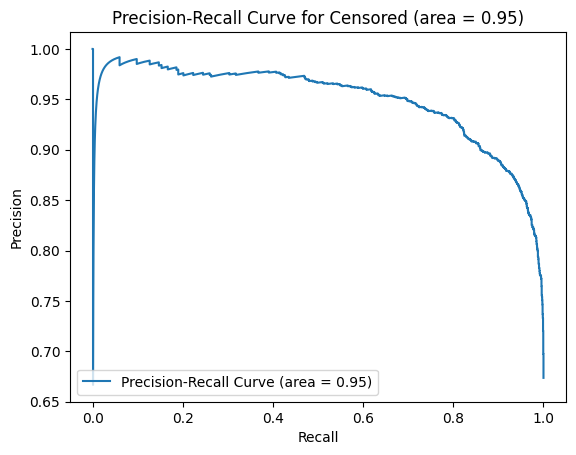

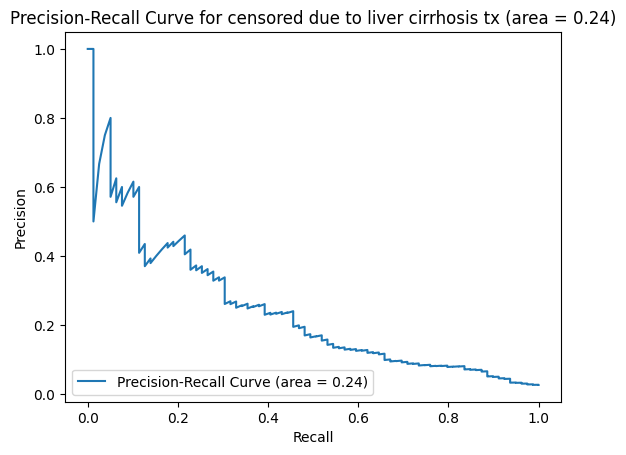

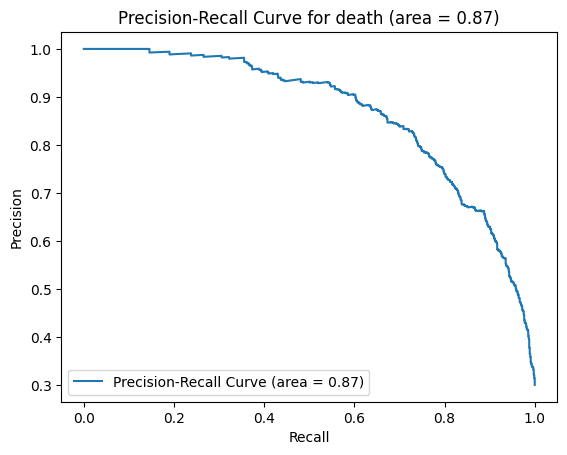

In [1412]:
# Precision-Recall Curve
y_test_bin = label_binarize(y_test, classes=model.classes_) 

class_names = ['Censored', 'censored due to liver cirrhosis tx', 'death'] 

for i in range(len(class_names)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    pr_auc = auc(recall, precision)
    plt.figure()
    plt.plot(recall, precision, label=f"Precision-Recall Curve (area = {pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve for {class_names[i]} (area = {pr_auc:.2f})")
    plt.legend(loc="lower left")
    plt.show()

#### **8.3.3. Misclassification Analysis**

In [1413]:
misclassified_indices = [i for i in range(len(y_test)) if y_test[i] != y_pred[i]]
print("Number of Misclassifications:", len(misclassified_indices))

Number of Misclassifications: 447


## **9. Kaggle Submission**

In [1414]:
y_pred_proba = model.predict_proba(X_test)

# The submission DataFrame 
submission = pd.DataFrame({
    'id': X_test['id'], 
    'Status_C': y_pred_proba[:, 0],  
    'Status_CL': y_pred_proba[:, 1], 
    'Status_D': y_pred_proba[:, 2], })

# Save to CSV
submission.to_csv('/kaggle/working/submission.csv', index=False)

# For Excel files
submission.to_excel('/kaggle/working/submission.xlsx', index=False)

# File head
print(submission.head())

         id  Status_C  Status_CL  Status_D
0  0.923645  0.121478   0.028780  0.849742
1 -0.236598  0.928953   0.007550  0.063498
2  1.308853  0.637389   0.099451  0.263159
3 -1.532865  0.919316   0.010474  0.070210
4 -0.353223  0.932903   0.010916  0.056181
